In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import json
from datetime import date, timedelta
import math
np.random.seed(seed=42)
# plt.rcParams['text.usetex'] = True
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set_style("whitegrid", rc={'font.family': 'Times New Roman', 'font.size': 16})
plt.rc('legend',fontsize=16)
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 14, 'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style("whitegrid", rc={'font.size': 16})

from constants import LOCATION_CHOOSEN, LOCATION_CHOOSEN_2, OUTPUT_DIR, DATA_CACHE_DIR, OPTIMAL_VALUES_FILE, STRINGENCY_BASED_GDP

In [2]:
data_path = os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_merged_data.csv")
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
else:
    df = pd.read_excel("owid-covid-data.xlsx")
    df = df.loc[df['iso_code'] == LOCATION_CHOOSEN]
    df.to_csv(data_path, index=False)

In [3]:
start_date = date(2020, 5, 1)
end_date = date(2022, 11, 1)
# end_date = date(2023, 7, 1)
delta = timedelta(days=1)

worldometers_dates = []
worldometers_total_cases = []
worldometers_total_recovered = []
worldometers_active_cases = []

while start_date <= end_date:
    date_str = start_date.strftime("%Y%m%d")
    data_path_worldometer = os.path.join(DATA_CACHE_DIR, "worldometer", date_str + ".csv")
    if os.path.exists(data_path_worldometer):
        worldometer_df = pd.read_csv(data_path_worldometer)
        worldometer_df.columns = ['country' if col.startswith('Country') else col for col in worldometer_df.columns]
        worldometer_df.columns = worldometer_df.columns.str.lower().str.replace(' ', '')
        date_data = ""
        total_cases = 0
        total_recovered = 0
        worldometer_df_specified_location = worldometer_df.loc[(worldometer_df["country"].str.lower() == LOCATION_CHOOSEN_2.lower())]
        date_data = date_str[:4] + "-" + date_str[4:6] + "-" + date_str[6:]
        total_cases = 0.0 if math.isnan(worldometer_df_specified_location["totalcases"].item()) else worldometer_df_specified_location["totalcases"].item()
        active_cases = 0.0 if math.isnan(worldometer_df_specified_location["activecases"].item()) else worldometer_df_specified_location["activecases"].item()
        total_recovered = 0.0 if math.isnan(worldometer_df_specified_location["totalrecovered"].item()) else worldometer_df_specified_location["totalrecovered"].item()
        print(date_data, total_cases, total_recovered, type(total_recovered), math.isnan(total_recovered))
        worldometers_dates.append(date_data)
        worldometers_total_cases.append(total_cases)
        worldometers_total_recovered.append(total_recovered)
        worldometers_active_cases.append(active_cases)
    else:
        print(data_path_worldometer, "DOES NOT EXIST -- COLLECT DATA MANUALLY")
    start_date += delta

2020-05-01 35043 9068.0 <class 'float'> False
2020-05-02 37257 10007.0 <class 'float'> False
2020-05-03 42505 11775.0 <class 'float'> False
2020-05-04 42670 11782.0 <class 'float'> False
2020-05-05 49400 14142.0 <class 'float'> False
2020-05-06 52987 15331.0 <class 'float'> False
2020-05-07 53045 15331.0 <class 'float'> False
2020-05-08 56516 16867.0 <class 'float'> False
2020-05-09 62808 19301.0 <class 'float'> False
2020-05-10 62939 19358.0 <class 'float'> False
2020-05-11 70768 22549.0 <class 'float'> False
2020-05-12 74243 24420.0 <class 'float'> False
2020-05-13 78055 26400.0 <class 'float'> False
2020-05-14 81990 27969.0 <class 'float'> False
2020-05-15 82103 27977.0 <class 'float'> False
2020-05-16 90615 34220.0 <class 'float'> False
2020-05-17 95648 36794.0 <class 'float'> False
2020-05-18 95698 36795.0 <class 'float'> False
2020-05-19 101261 39233.0 <class 'float'> False
2020-05-20 106475 42309.0 <class 'float'> False
2020-05-21 118226 48553.0 <class 'float'> False
2020-05-22 

2020-11-02 8229322 7544798.0 <class 'float'> False
2020-11-03 8267623 7603121.0 <class 'float'> False
2020-11-04 8313876 7656478.0 <class 'float'> False
2020-11-05 8364086 7711809.0 <class 'float'> False
2020-11-06 8411724 7765966.0 <class 'float'> False
2020-11-07 8462080 7819886.0 <class 'float'> False
2020-11-08 8507754 7868968.0 <class 'float'> False
2020-11-09 8553864 7917373.0 <class 'float'> False
2020-11-10 8591730 7959406.0 <class 'float'> False
2020-11-11 8636011 8013783.0 <class 'float'> False
2020-11-12 8684039 8064548.0 <class 'float'> False
2020-11-13 8737746 8122580.0 <class 'float'> False
2020-11-14 8773479 8163572.0 <class 'float'> False
2020-11-15 8814902 8205728.0 <class 'float'> False
2020-11-16 8845617 8249579.0 <class 'float'> False
2020-11-17 8900008 8318778.0 <class 'float'> False
2020-11-18 8912907 8335109.0 <class 'float'> False
2020-11-19 8960098 8383602.0 <class 'float'> False
2020-11-20 9004365 8428409.0 <class 'float'> False
2020-11-21 9050613 8478124.0 <c

2021-04-22 15930965 13454880 <class 'int'> False
2021-04-23 16378571 13692182 <class 'int'> False
2021-04-24 16951621 14077870 <class 'int'> False
2021-04-25 17304308 14292791 <class 'int'> False
2021-04-26 17313163 14304382 <class 'int'> False
2021-04-27 17636307 14556209 <class 'int'> False
2021-04-28 17997267 14817371 <class 'int'> False
2021-04-29 18376524 15086878 <class 'int'> False
2021-04-30 18762976 15384418 <class 'int'> False
2021-05-01 19164969 15684406 <class 'int'> False
2021-05-02 19557457 15992271 <class 'int'> False
2021-05-03 19925604 16293003 <class 'int'> False
2021-05-04 20282833 16613292 <class 'int'> False
2021-05-05 20665148 16951731 <class 'int'> False
2021-05-06 21242580 17407470 <class 'int'> False
2021-05-07 21491598 17612351 <class 'int'> False
2021-05-08 21892676 17930960 <class 'int'> False
2021-05-09 22296414 18317404 <class 'int'> False
2021-05-10 22662575 18671222 <class 'int'> False
2021-05-11 22992517 19027304 <class 'int'> False
2021-05-12 23340938 

2021-10-04 33834702 33121247.0 <class 'float'> False
2021-10-05 33853048 33150886.0 <class 'float'> False
2021-10-06 33871881 33175656.0 <class 'float'> False
2021-10-07 33894312 33200258.0 <class 'float'> False
2021-10-08 33915569 33225221.0 <class 'float'> False
2021-10-09 33935309 33248291.0 <class 'float'> False
2021-10-10 33953475 33271915.0 <class 'float'> False
2021-10-11 33971293 33285879.0 <class 'float'> False
2021-10-12 33985920 33320057.0 <class 'float'> False
2021-10-13 34001743 33342901.0 <class 'float'> False
2021-10-14 34020730 33362709.0 <class 'float'> False
2021-10-15 34037592 33382100.0 <class 'float'> False
2021-10-16 34052687 33392353.0 <class 'float'> False
2021-10-17 34067719 33419749.0 <class 'float'> False
2021-10-18 34081315 33439331.0 <class 'float'> False
2021-10-19 34094373 33458801.0 <class 'float'> False
2021-10-20 34108996 33478247.0 <class 'float'> False
2021-10-21 34127450 33495808.0 <class 'float'> False
2021-10-22 34143236 33514449.0 <class 'float'>

2022-03-11 42984261 42426328.0 <class 'float'> False
2022-03-12 42987875 42431513.0 <class 'float'> False
2022-03-13 42990991 42437072.0 <class 'float'> False
2022-03-14 42993494 42441449.0 <class 'float'> False
2022-03-15 42996062 42446171.0 <class 'float'> False
2022-03-16 42998938 42450055.0 <class 'float'> False
2022-03-17 43001477 42454546.0 <class 'float'> False
2022-03-18 43004005 42458543.0 <class 'float'> False
2022-03-19 43006080 42461926.0 <class 'float'> False
2022-03-20 43007841 42465122.0 <class 'float'> False
2022-03-21 43009390 42467774.0 <class 'float'> False
2022-03-22 43010971 42470515.0 <class 'float'> False
2022-03-23 43012749 42473057.0 <class 'float'> False
2022-03-24 43014687 42475588.0 <class 'float'> False
2022-03-25 43016372 42478087.0 <class 'float'> False
2022-03-26 43018032 42480436.0 <class 'float'> False
2022-03-27 43019453 42482262.0 <class 'float'> False
2022-03-28 43020723 42483829.0 <class 'float'> False
2022-03-29 43021982 42485534.0 <class 'float'>

2022-08-29 44415723 43802993.0 <class 'float'> False
2022-08-30 44419671 43825024.0 <class 'float'> False
2022-08-31 44429258 43825024.0 <class 'float'> False
2022-09-01 44436339 43845680.0 <class 'float'> False
2022-09-02 44442507 43855365.0 <class 'float'> False
2022-09-03 44449726 43865016.0 <class 'float'> False
2022-09-04 44456535 43873430.0 <class 'float'> False
2022-09-05 44462445 43880464.0 <class 'float'> False
2022-09-06 44466862 43886496.0 <class 'float'> False
2022-09-07 44472241 43893590.0 <class 'float'> False
2022-09-08 44478636 43900204.0 <class 'float'> False
2022-09-09 44484729 43906972.0 <class 'float'> False
2022-09-10 44490283 43913294.0 <class 'float'> False
2022-09-11 44495359 43919264.0 <class 'float'> False
2022-09-12 44500580 43925239.0 <class 'float'> False
2022-09-13 44504949 43930417.0 <class 'float'> False
2022-09-14 44507882 43930417.0 <class 'float'> False
2022-09-15 44516479 43941840.0 <class 'float'> False
2022-09-16 44522777 43947756.0 <class 'float'>

In [4]:
worldometer_df = pd.DataFrame({"date": worldometers_dates, "total_cases_worldometer": worldometers_total_cases, "total_recovered_worldometer": worldometers_total_recovered, "active_cases_worldometer": worldometers_active_cases})
result = pd.merge(df, worldometer_df, on="date")
df = result

df['date'] = pd.to_datetime(df['date'])

In [5]:
df

,date,stringency_index,total_cases,total_deaths,total_vaccinations,population,people_fully_vaccinated,gdp_normalized,gdp_normalized_modelled,total_cases_worldometer,total_recovered_worldometer,active_cases_worldometer
0,2020-05-01,96.30,35043.0,1147.0,0.000000e+00,1.417173e+09,7668.0,83.905433,88.264410,35043,9068.0,24821.0
1,2020-05-02,96.30,37336.0,1218.0,0.000000e+00,1.417173e+09,7668.0,84.041307,88.264410,37257,10007.0,26027.0
2,2020-05-03,96.30,39980.0,1301.0,0.000000e+00,1.417173e+09,7668.0,84.177181,88.264410,42505,11775.0,29339.0
3,2020-05-04,81.94,42533.0,1373.0,0.000000e+00,1.417173e+09,7668.0,84.313055,94.904432,42670,11782.0,29493.0
4,2020-05-05,81.94,46433.0,1568.0,0.000000e+00,1.417173e+09,7668.0,84.448930,94.904432,49400,14142.0,33565.0
...,...,...,...,...,...,...,...,...,...,...,...,...
910,2022-10-28,31.48,44649088.0,528999.0,2.196044e+09,1.417173e+09,950032740.0,99.893668,99.063148,44649088,44100691.0,19398.0
911,2022-10-29,31.48,44650662.0,529008.0,2.196215e+09,1.417173e+09,950066782.0,99.898210,99.063148,44650714,44102852.0,18854.0
912,2022-10-30,31.48,44652266.0,529016.0,2.196336e+09,1.417173e+09,950090439.0,99.902753,99.063148,44652266,44104933.0,18317.0
913,2022-10-31,31.48,44653592.0,529024.0,2.196409e+09,1.417173e+09,950104356.5,99.907295,99.063148,44653592,44106656.0,17912.0


In [6]:
# deaths are considered recovered: https://www.kaggle.com/code/lisphilar/covid-19-data-with-sir-model/notebook?scriptVersionId=28560520
# https://lisphilar.github.io/covid19-sir/02_data_engineering.html#1.-Data-cleaning

# df['N'] = df['population']
# df['S'] = df['population'] - df['total_cases_worldometer'] - df['people_fully_vaccinated']
# df['I'] = df['total_cases_worldometer'] - df['total_recovered_worldometer'] - df['total_deaths']
# df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated'] + df['total_deaths']

# without deaths model
df['N'] = df['population']
df['S'] = df['population'] - df['total_cases_worldometer'] - df['people_fully_vaccinated'] - df['total_recovered_worldometer']
df['I'] = df['total_cases_worldometer'] - df['total_recovered_worldometer']
df['R'] = df['total_recovered_worldometer'] + df['people_fully_vaccinated']

2313.0


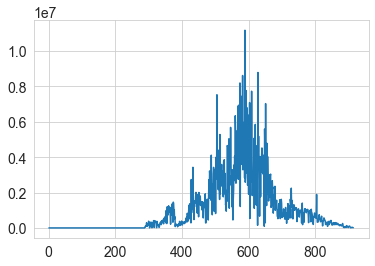

In [7]:
plt.plot( df['people_fully_vaccinated'].diff())
print(min(df['people_fully_vaccinated'].diff()[290:]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


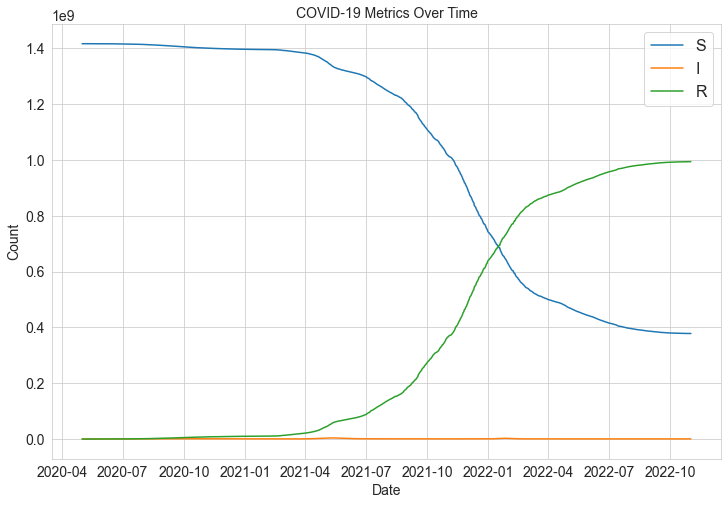

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['S'], label='S')
plt.plot(df['date'], df['I'], label='I')
plt.plot(df['date'], df['R'], label='R')
plt.title('COVID-19 Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "metrics_over_time_" + LOCATION_CHOOSEN + ".eps"))
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


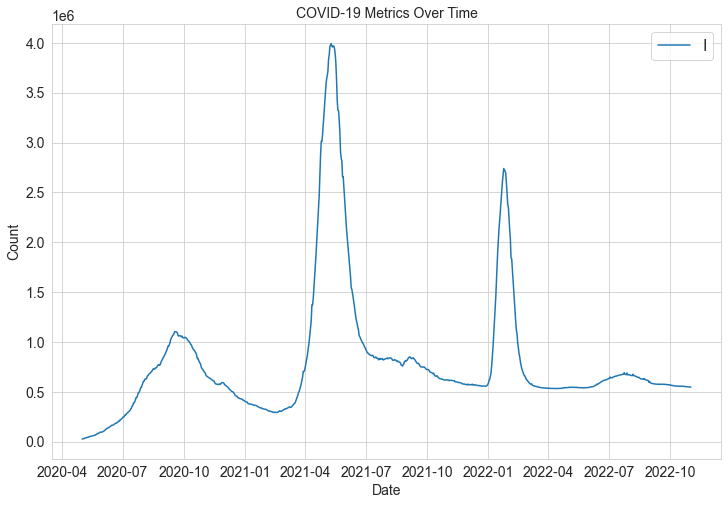

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['I'], label='I')
plt.title('COVID-19 Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "infected_over_time_" + LOCATION_CHOOSEN + ".eps"))
plt.show()

## SIR Model

In [10]:
# def compute_cost(data, predictions):
#     # mse
#     return np.square(data - predictions).mean()

# def compute_cost(data, predictions):
#     # mae
#     return np.abs(data - predictions).mean()

# def compute_cost(data, predictions):
#     # Relative Root Mean Squared Error
#     residual = data - predictions
#     root_mean_squared_error = np.sqrt(np.mean(np.square(residual)))
#     mean_data = np.mean(data)
#     return root_mean_squared_error / mean_data

def compute_cost(data, predictions, delta=1.0):
    # Huber loss
    residual = np.abs(data - predictions)
    condition = residual < delta
    squared_loss = 0.5 * np.square(residual)
    linear_loss = delta * (residual - 0.5 * delta)
    return np.where(condition, squared_loss, linear_loss).mean()

In [11]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma))
    return result

def objective_function(params, y0, t, N):
    predictions = integrate_system(params, y0, t, N)
    S, I, R = predictions.T
    cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) +  compute_cost(df['R'], R)
    return cost

In [12]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item() + 1, df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.4, 1/15 
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

optimal_beta: 0.04208479828695971 optimal_gamma: 0.02388356686032017
optimal_beta/optimal_gamma: 1.7620817917644795


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


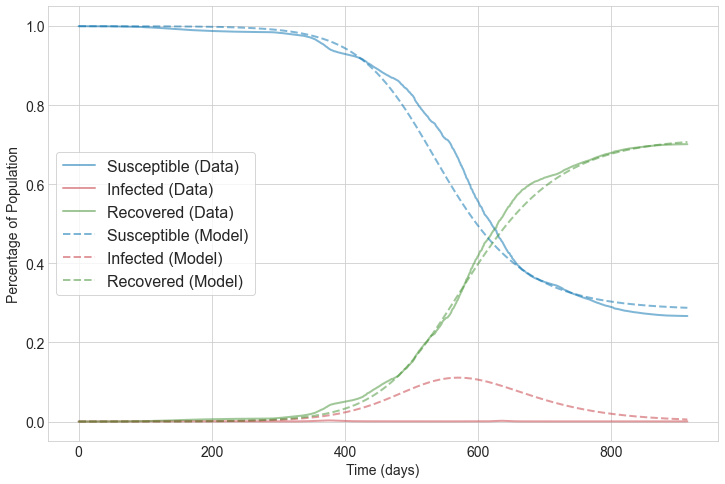

cost: 85051490.53250012


In [13]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, color="#006EAE", alpha=0.5, lw=2, label='Susceptible (Data)')
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected (Data)')
plt.plot(t, df['R']/N, color="#429130", alpha=0.5, lw=2, label='Recovered (Data)')

plt.plot(t, S/N, color="#006EAE", linestyle="--", alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, color="#429130", linestyle="--", alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
# legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_frame().set_alpha(0.5)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

SIR_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIR_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


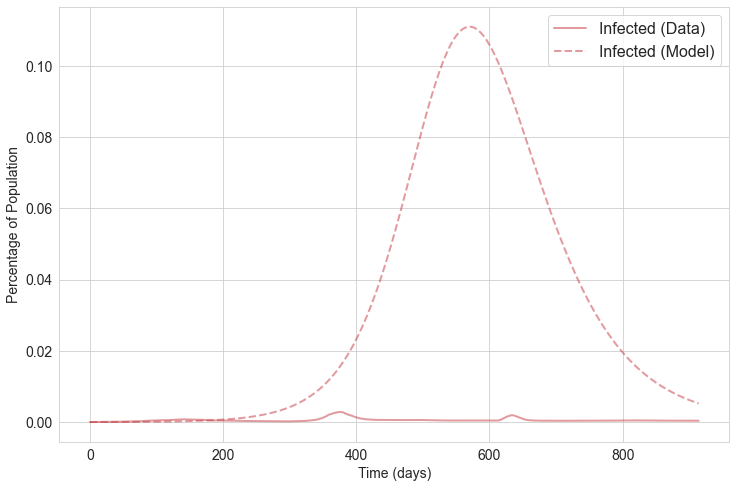

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected (Data)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (Model)')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [15]:
r0 = optimal_beta/optimal_gamma

df["S_modelled"] = S
df["I_modelled"] = I
df["R_modelled"] = R
df["r_eff_modelled"] = r0 * df["S_modelled"]/N
df["r_eff_actual"] = r0 * df["S"]/df["N"]

## SIR Model with Lockdown

In [16]:
def deriv(y, t, N, beta, gamma, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, lockdown):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, lockdown))
    return result

def objective_function(params, y0, t, N, lockdown):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

In [17]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.2, 1./10 
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

optimal_beta: 0.4013340889432941 optimal_gamma: 0.09017476605499258
optimal_beta/optimal_gamma: 4.450625230328213


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


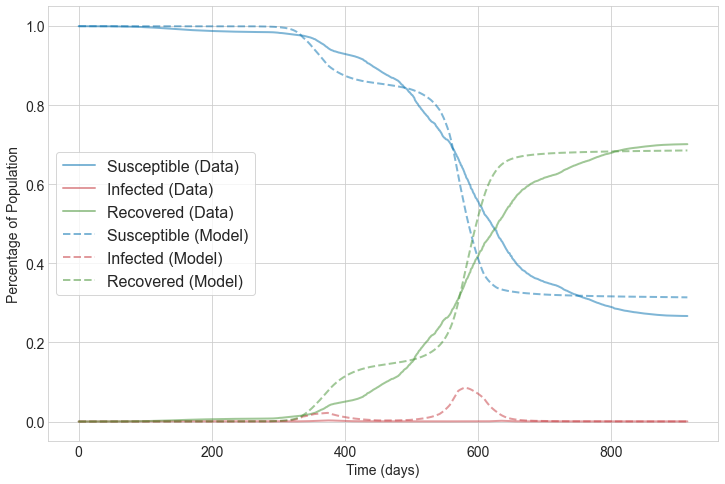

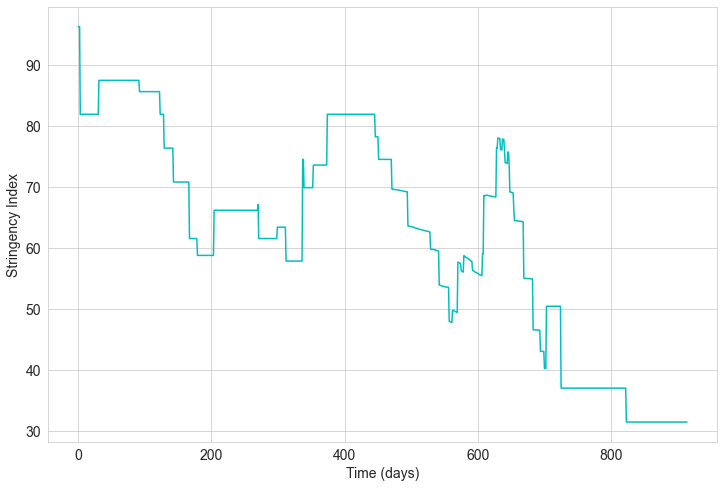

cost: 98438821.45587364


In [18]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
lockdown = list(df['stringency_index'].values / 100)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, lockdown))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, color="#006EAE", alpha=0.5, lw=2, label='Susceptible (Data)')
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected (Data)')
plt.plot(t, df['R']/N, color="#429130", alpha=0.5, lw=2, label='Recovered (Data)')

plt.plot(t, S/N, color="#006EAE", linestyle="--", alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, color="#429130", linestyle="--", alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
# legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_frame().set_alpha(0.5)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['stringency_index'], 'c')
plt.xlabel('Time (days)')
plt.ylabel('Stringency Index')
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "stringency_varying_with_time_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

SIR_with_lockdown_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIR_with_lockdown_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


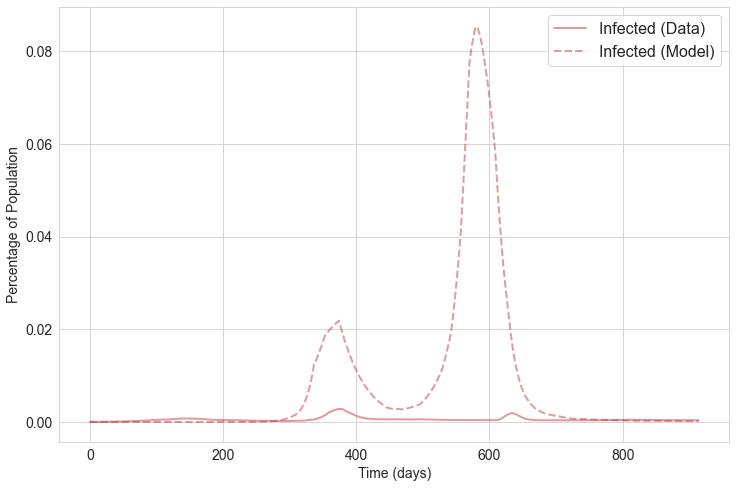

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected (Data)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (Model)')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIR_model_with_lockdown_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [20]:
r0 = optimal_beta/optimal_gamma

df["S_modelled_with_lockdown"] = S
df["I_modelled_with_lockdown"] = I
df["R_modelled_with_lockdown"] = R
df["r_eff_modelled_with_lockdown"] = r0 * df["S_modelled_with_lockdown"]/N
df["r_eff_actual_with_lockdown"] = r0 * df["S"]/df["N"]

## SIRV Model Lockdown

In [21]:
def deriv(y, t, N, beta, gamma, nu, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N - nu * S
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I + nu * S
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, lockdown):
    beta, gamma, nu = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, nu, lockdown))
    return result

def objective_function(params, y0, t, N, lockdown):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

In [22]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
# initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.0001
# initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.000001
initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.000001
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

optimal_beta: 0.40897034072952304 optimal_gamma: 0.09196829370123338 optimal_nu: 2.9044029843851936e-05
optimal_beta/optimal_gamma: 4.446862329077204


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


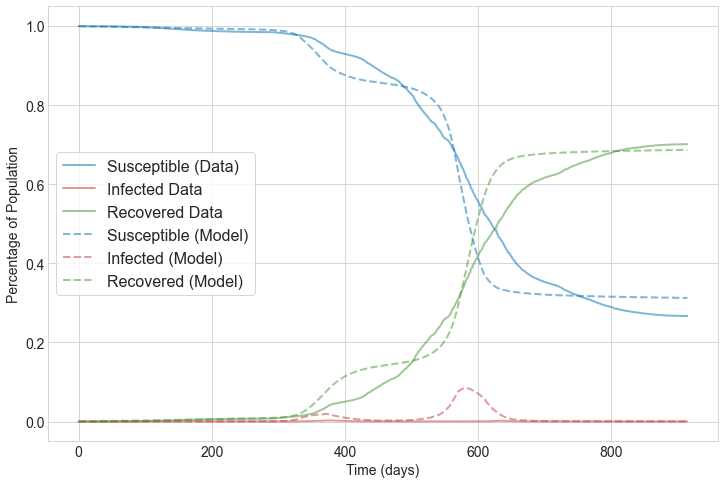

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


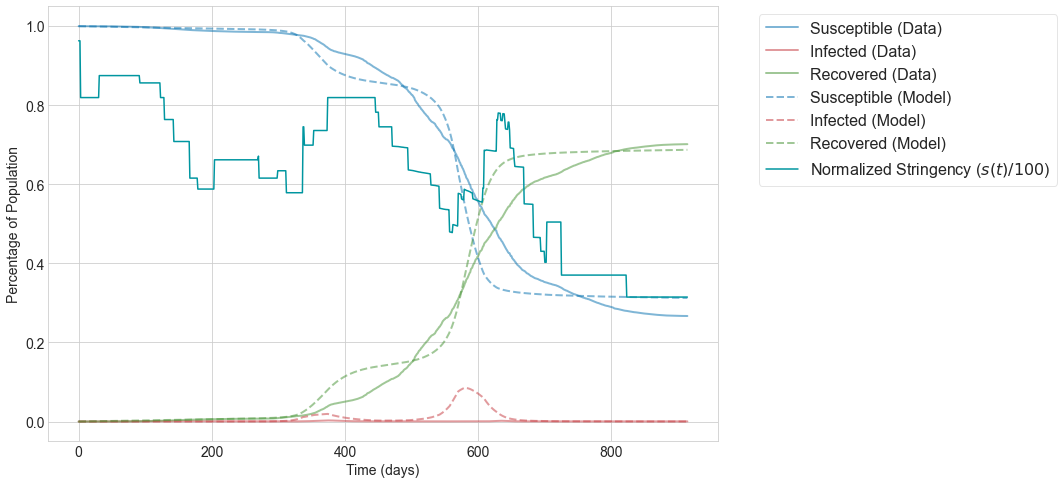

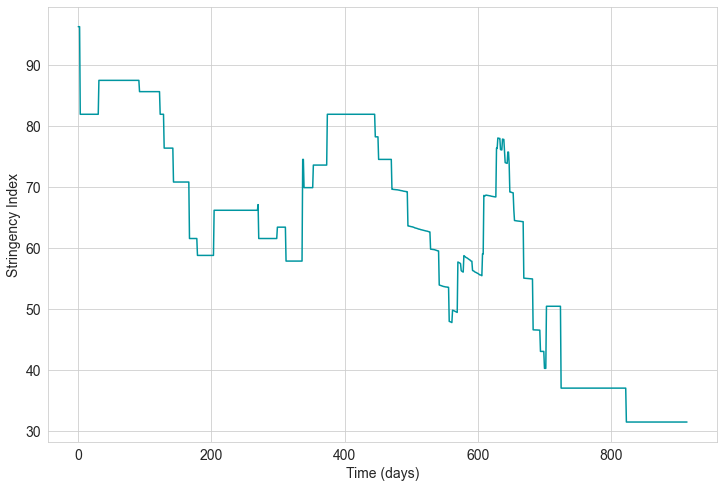

cost: 94636860.38436058


In [23]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu]
lockdown = list(df['stringency_index'].values / 100)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma, optimal_nu = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma} optimal_nu: {optimal_nu}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, optimal_nu, lockdown))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, color="#006EAE", alpha=0.5, lw=2, label='Susceptible (Data)')
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, color="#429130", alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, color="#006EAE", linestyle="--", alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, color="#429130", linestyle="--", alpha=0.5, lw=2, label='Recovered (Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
# legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_frame().set_alpha(0.5)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, color="#006EAE", alpha=0.5, lw=2, label='Susceptible (Data)')
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected (Data)')
plt.plot(t, df['R']/N, color="#429130", alpha=0.5, lw=2, label='Recovered (Data)')

plt.plot(t, S/N, color="#006EAE", linestyle="--", alpha=0.5, lw=2, label='Susceptible (Model)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (Model)')
plt.plot(t, R/N, color="#429130", linestyle="--", alpha=0.5, lw=2, label='Recovered (Model)')
plt.plot(t, df['stringency_index']/100, color='#0096A0', label=r"Normalized Stringency ($s(t)/100$)")

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_alpha(0.5)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_with_stringency_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['stringency_index'], color='#0096A0')
plt.xlabel('Time (days)')
plt.ylabel('Stringency Index')
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "stringency_varying_with_time_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

SIRV_with_lockdown_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIRV_with_lockdown_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


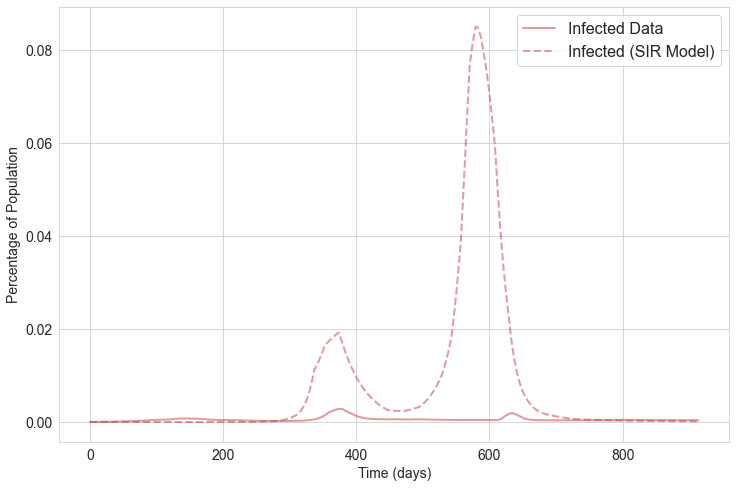

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (SIR Model)')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_infections_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [25]:
r0 = optimal_beta/optimal_gamma

df["S_modelled_with_lockdown_with_vaccination"] = S
df["I_modelled_with_lockdown_with_vaccination"] = I
df["R_modelled_with_lockdown_with_vaccination"] = R
df["r_eff_modelled_with_lockdown_with_vaccination"] = r0 * df["S_modelled_with_lockdown_with_vaccination"]/N
df["r_eff_actual_with_lockdown_with_vaccination"] = r0 * df["S"]/df["N"]

## Vaccination dependent on Time

In [26]:
window_length = 20

def deriv(y, t, N, nu, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -optimal_beta * (1 - lockdown[int(t)]) * S * I / N - nu * S
    dIdt = optimal_beta * (1 - lockdown[int(t)]) * S * I / N - optimal_gamma * I
    dRdt = optimal_gamma * I + nu * S
#     print(dSdt, dIdt, dRdt)
    return dSdt[0], dIdt, dRdt[0]

def integrate_system(params, y0, t, N, lockdown):
    nu = params
    result = odeint(deriv, y0, t, args=(N, nu, lockdown), hmax=1.0)
    return result

def objective_function(params, y0, t, N, lockdown, days_window):
    predictions = integrate_system(params, y0, t, N, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'][days_window-window_length:days_window], S) + 
            compute_cost(df['I'][days_window-window_length:days_window], I) + 
            compute_cost(df['R'][days_window-window_length:days_window], R))
    return cost

In [27]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma, initial_guess_for_nu = 0.2, 1./10, 0.001

In [28]:
nu_changing_with_time = []
time_points_for_nu = []
for days_window in range(window_length, days_difference, window_length):
    lockdown = list(df['stringency_index'].values / 100)[days_window - 10:days_window]
    t = np.linspace(days_window - window_length, days_window, window_length)
    initial_guesses = [initial_guess_for_nu]
    result = minimize(
        objective_function,
        initial_guesses,
        args=(y0, t, N, lockdown, days_window),
        method='Nelder-Mead',
    )
    optimal_nu = result.x
    print(f"optimal_nu: {optimal_nu}")
    if optimal_nu < 0.0:
        optimal_nu = [0.0]
    nu_changing_with_time.append(optimal_nu[0])
    time_points_for_nu.append(days_window - window_length)
    y0 = df.loc[days_window, ['S']].item(), df.loc[days_window, ['I']].item(), df.loc[days_window, ['R']].item()

optimal_nu: [-2.41088867e-07]
optimal_nu: [-2.43484974e-07]
optimal_nu: [4.07218933e-07]
optimal_nu: [1.84783936e-06]
optimal_nu: [7.99455643e-06]
optimal_nu: [7.00564384e-06]
optimal_nu: [-3.88770103e-06]
optimal_nu: [-9.42312479e-06]
optimal_nu: [-8.6126411e-05]
optimal_nu: [-6.2001133e-05]
optimal_nu: [-2.50025302e-05]
optimal_nu: [-2.87252188e-05]
optimal_nu: [-2.68959641e-05]
optimal_nu: [-3.43594193e-05]
optimal_nu: [2.45387256e-06]
optimal_nu: [0.00010706]
optimal_nu: [0.00015083]
optimal_nu: [0.00036796]
optimal_nu: [0.00074174]
optimal_nu: [0.000325]
optimal_nu: [0.00027749]
optimal_nu: [0.00092022]
optimal_nu: [0.00109287]
optimal_nu: [0.00086984]
optimal_nu: [0.00181926]
optimal_nu: [0.00276877]
optimal_nu: [0.00225196]
optimal_nu: [0.0026587]
optimal_nu: [0.00460345]
optimal_nu: [0.00568603]
optimal_nu: [0.00525362]
optimal_nu: [0.00516585]
optimal_nu: [0.00535744]
optimal_nu: [0.00344614]
optimal_nu: [0.00190317]
optimal_nu: [0.0012968]
optimal_nu: [0.002365]
optimal_nu: [

## SIRV model with time varying nu

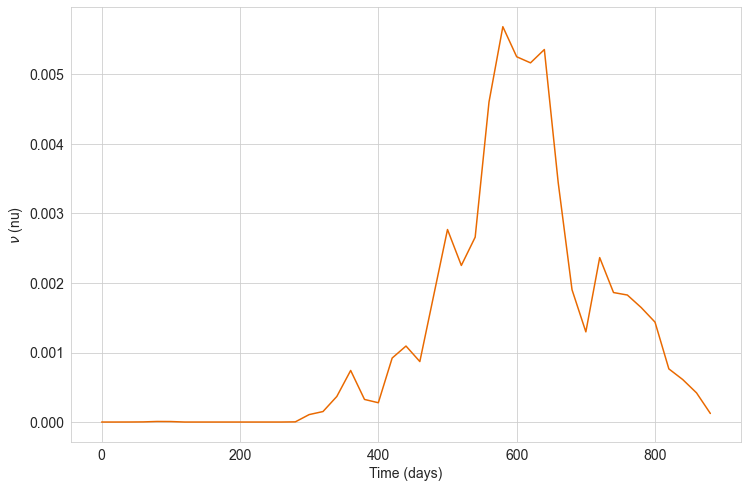

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(time_points_for_nu, nu_changing_with_time, color="#E96900")
plt.xlabel('Time (days)')
plt.ylabel(r'$\nu$ (nu)')
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "nu_varying_with_time_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [30]:
new_time_points = np.arange(0, 915, 1)  # Adjust the range and step size as needed

# Interpolate nu_changing_with_time to match the new time points
interpolated_nu = np.interp(new_time_points, time_points_for_nu, nu_changing_with_time)

# Print the interpolated nu array and its length
print(len(interpolated_nu))

915


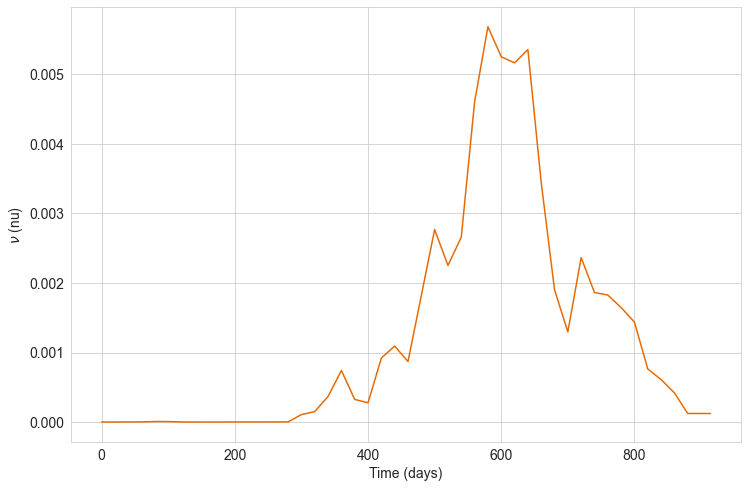

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(new_time_points, interpolated_nu, color="#E96900")
plt.xlabel('Time (days)')
plt.ylabel(r'$\nu$ (nu)')
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "interpolated_nu_varying_with_time_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [32]:
df['nu_varying_with_time'] = interpolated_nu

In [33]:
def deriv(y, t, N, beta, gamma, nu_varying, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N - nu_varying[int(t)] * S
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I + nu_varying[int(t)] * S
    return dSdt, dIdt, dRdt

def integrate_system(params, y0, t, N, nu_varying, lockdown):
    beta, gamma = params
    result = odeint(deriv, y0, t, args=(N, beta, gamma, nu_varying, lockdown))
    return result

def objective_function(params, y0, t, N, nu_varying, lockdown):
    predictions = integrate_system(params, y0, t, N, nu_varying, lockdown)
    S, I, R = predictions.T
    cost = (compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R))
    return cost

In [34]:
N = df.loc[min(df.index), ['N']].item()
y0 = df.loc[min(df.index), ['S']].item(), df.loc[min(df.index), ['I']].item(), df.loc[min(df.index), ['R']].item()
initial_guess_for_beta, initial_guess_for_gamma = 0.2, 1./10
days_difference = (max(df['date']) - min(df['date'])).days
t = np.linspace(0, days_difference, days_difference + 1)

optimal_beta: 0.5129414911377119 optimal_gamma: 0.12716245167626106
optimal_beta/optimal_gamma: 4.033749620081199


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


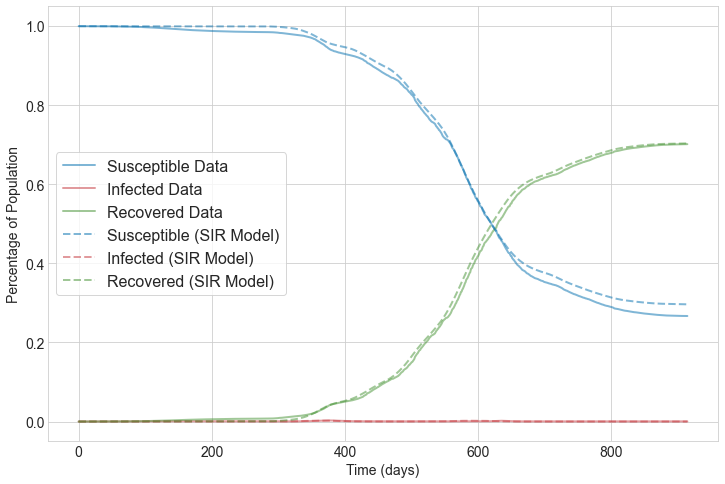

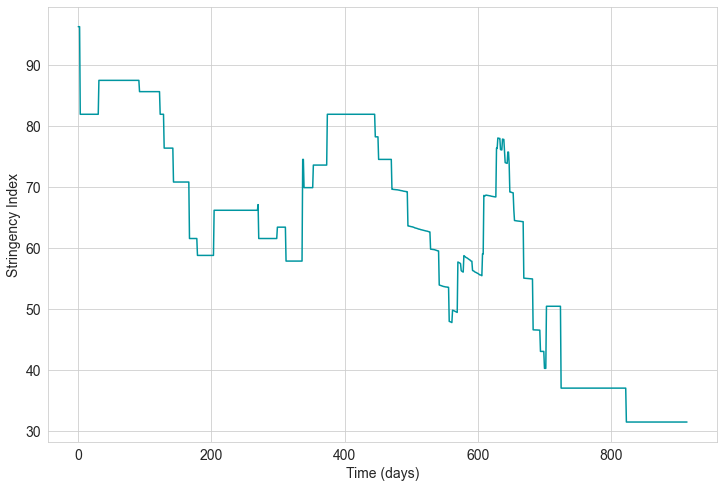

cost: 29742589.698910963


In [35]:
initial_guesses = [initial_guess_for_beta, initial_guess_for_gamma]
lockdown = list(df['stringency_index'].values / 100)
nu_varying = list(df['nu_varying_with_time'].values)
result = minimize(
    objective_function,
    initial_guesses,
    args=(y0, t, N, nu_varying, lockdown),
    method='Nelder-Mead',
)
optimal_beta, optimal_gamma = result.x
print(f"optimal_beta: {optimal_beta} optimal_gamma: {optimal_gamma}")
print(f"optimal_beta/optimal_gamma: {optimal_beta/optimal_gamma}")

ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, nu_varying, lockdown))
S, I, R = ret.T

plt.figure(figsize=(12, 8))
plt.plot(t, df['S']/N, color="#006EAE", alpha=0.5, lw=2, label='Susceptible Data')
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, df['R']/N, color="#429130", alpha=0.5, lw=2, label='Recovered Data')

plt.plot(t, S/N, color="#006EAE", linestyle="--", alpha=0.5, lw=2, label='Susceptible (SIR Model)')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (SIR Model)')
plt.plot(t, R/N, color="#429130", linestyle="--", alpha=0.5, lw=2, label='Recovered (SIR Model)')

plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.tick_params(length=0)
plt.grid(True)
# legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# legend.get_frame().set_alpha(0.5)
plt.legend()
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_time_varying_nu_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(t, df['stringency_index'], color='#0096A0')
plt.xlabel('Time (days)')
plt.ylabel('Stringency Index')
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "stringency_varying_with_time_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

SIRV_with_lockdown_time_varying_nu_cost = compute_cost(df['S'], S) + compute_cost(df['I'], I) + compute_cost(df['R'], R)
print(f"cost: {SIRV_with_lockdown_time_varying_nu_cost}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


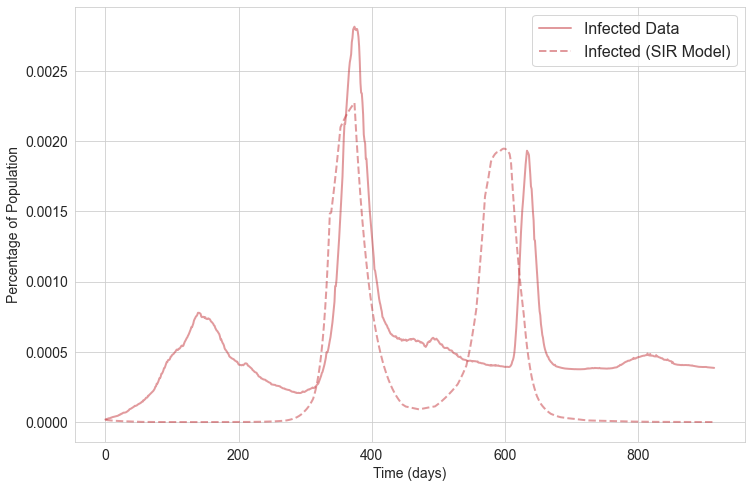

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(t, df['I']/N, color="#C5373D", alpha=0.5, lw=2, label='Infected Data')
plt.plot(t, I/N, color="#C5373D", linestyle="--", alpha=0.5, lw=2, label='Infected (SIR Model)')
plt.xlabel('Time (days)')
plt.ylabel('Percentage of Population')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "SIRV_model_with_lockdown_infections_time_varying_nu_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()

In [37]:
r0 = optimal_beta/optimal_gamma

df["S_modelled_with_lockdown_with_vaccination_time_varying_nu"] = S
df["I_modelled_with_lockdown_with_vaccination_time_varying_nu"] = I
df["R_modelled_with_lockdown_with_vaccination_time_varying_nu"] = R
df["r_eff_modelled_with_lockdown_with_vaccination_time_varying_nu"] = r0 * df["S_modelled_with_lockdown_with_vaccination_time_varying_nu"]/N
df["r_eff_actual_with_lockdown_with_vaccination_time_varying_nu"] = r0 * df["S"]/df["N"]

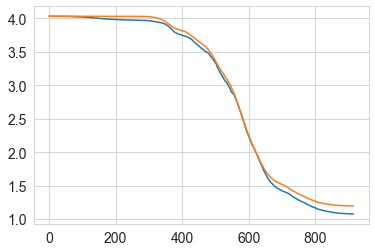

In [38]:
plt.plot(df["r_eff_actual_with_lockdown_with_vaccination_time_varying_nu"])
plt.plot(df["r_eff_modelled_with_lockdown_with_vaccination_time_varying_nu"])

In [39]:
print(max(df["I_modelled_with_lockdown_with_vaccination_time_varying_nu"]/N))

0.0022733374452361317


In [40]:
optimal_values = {
    'optimal_beta': optimal_beta,
    'optimal_gamma': optimal_gamma,
}

with open(OPTIMAL_VALUES_FILE, "w") as outfile: 
    json.dump(optimal_values, outfile)

In [41]:
#breakcode

## Comparing costs

In [42]:
print(SIR_cost, SIR_with_lockdown_cost, SIRV_with_lockdown_cost, SIRV_with_lockdown_time_varying_nu_cost)

85051490.53250012 98438821.45587364 94636860.38436058 29742589.698910963


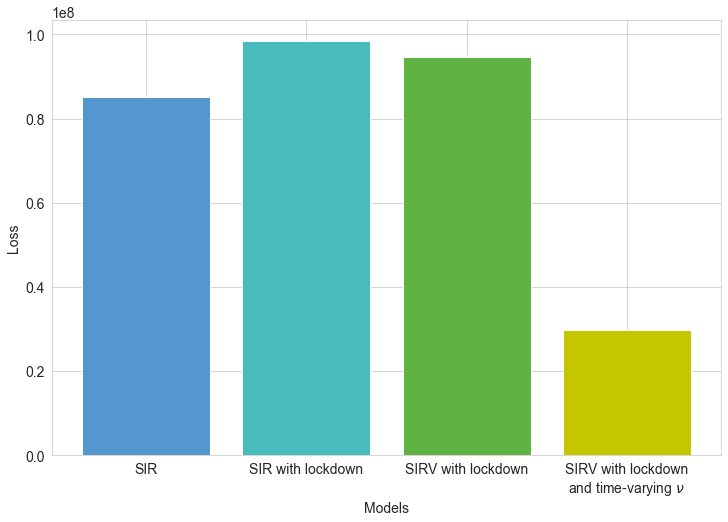

In [43]:
models = ['SIR', 'SIR with lockdown', 'SIRV with lockdown', r"""SIRV with lockdown
and time-varying $\nu$"""]

# Corresponding costs
costs = [SIR_cost, SIR_with_lockdown_cost, SIRV_with_lockdown_cost, SIRV_with_lockdown_time_varying_nu_cost]

plt.figure(figsize=(12, 8))
plt.bar(models, costs, color =["#5496CE", "#48BCBC", "#5EB342", "#C5C500"])
plt.xlabel('Models')
plt.ylabel('Loss')
# plt.title('Costs of Different Models')
plt.grid(True)
plt.savefig(os.path.join(OUTPUT_DIR, "comparing_costs_" + LOCATION_CHOOSEN + ".eps"), bbox_inches="tight")
plt.show()
plt.show()

In [44]:
stringency_data_points = np.arange(0, 100, 0.5)
fit_line_loaded = np.poly1d(np.load(STRINGENCY_BASED_GDP))
predicted_gdp = fit_line_loaded(stringency_data_points)
MIN_GDP = min(predicted_gdp)
MAX_GDP = max(predicted_gdp)

In [45]:
df['gdp_min_max_normalized'] = (df['gdp_normalized'] - MIN_GDP) / (MAX_GDP - MIN_GDP)
df['gdp_normalized_modelled_min_max_normalized'] =  (df['gdp_normalized_modelled'] - MIN_GDP) / (MAX_GDP - MIN_GDP)

In [46]:
df.to_csv(os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_merged_data.csv"))

## BREAKPOINT

In [31]:
df = pd.read_csv(os.path.join(DATA_CACHE_DIR, LOCATION_CHOOSEN + "_merged_data.csv"))
df['date'] = pd.to_datetime(df['date'])

with open(OPTIMAL_VALUES_FILE, 'r') as f:
    optimal_values_read = f.read()
    optimal_values = json.loads(optimal_values_read)
optimal_beta = optimal_values['optimal_beta']
optimal_gamma = optimal_values['optimal_gamma']

r0 = optimal_beta/optimal_gamma

stringency_data_points = np.arange(0, 100, 0.5)
fit_line_loaded = np.poly1d(np.load(STRINGENCY_BASED_GDP))
predicted_gdp = fit_line_loaded(stringency_data_points)
MIN_GDP = min(predicted_gdp)
MAX_GDP = max(predicted_gdp)

In [32]:
df.diff()['stringency_index'][1:].describe()

count    914.000000
mean      -0.070919
std        1.427145
min      -14.360000
25%        0.000000
50%        0.000000
75%        0.000000
max       16.670000
Name: stringency_index, dtype: float64

In [33]:
df['stringency_index'].describe()

count    915.000000
mean      61.965049
std       17.669831
min       31.480000
25%       50.460000
50%       63.510000
75%       76.245000
max       96.300000
Name: stringency_index, dtype: float64

In [34]:
df['nu_varying_with_time']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
910    0.000123
911    0.000123
912    0.000123
913    0.000123
914    0.000123
Name: nu_varying_with_time, Length: 915, dtype: float64

In [49]:
actions_taken = []
# "output/actions_taken/-14154.05.txt"
with open("output/actions_taken/-225251.24.txt", "r") as f:
    for line in f:
        actions_taken.append(int(line.strip()))
start_stringency = 0.0
current_stringency_index = start_stringency
stringency_index_from_actions_taken = [current_stringency_index]
# stringency_index_from_actions_taken = []
diff_list = []
for action in actions_taken:
    reward_inertia_flag = False
    if action == 0:
        current_stringency_index = max(0, current_stringency_index - 10)
        diff = -10
    elif action == 1:
        current_stringency_index = max(0, current_stringency_index - 5)
        diff = -5
    elif action == 2:
        current_stringency_index = max(0, current_stringency_index - 2.5)
        diff = -2.5
    elif action == 3:
        current_stringency_index = max(0, current_stringency_index + 0)
        diff = 0
    elif action == 4:
        current_stringency_index = min(100, current_stringency_index + 2.5)
        diff = 2.5
    elif action == 5:
        current_stringency_index = min(100, current_stringency_index + 5)
        diff = 5
    elif action == 6:
        current_stringency_index = min(100, current_stringency_index + 10)
        diff = 10
    stringency_index_from_actions_taken.append(current_stringency_index)
    diff_list.append(diff)

# stringency_index_from_actions_taken = stringency_index_from_actions_taken + [0]
stringency_index_from_actions_taken = np.array(stringency_index_from_actions_taken)
stringency_index_from_actions_taken = stringency_index_from_actions_taken[:915]
# the below is a checking mechanism
# stringency_index_from_actions_taken = np.array([0] + list(df['stringency_index']))

In [69]:
def calculate_reward_weighted(gdp_min_max_normalized_list, r_eff_list):
    GDP_WEIGHT_1 = 100 # change this value and see how it affects the reward
    GDP_WEIGHT_2 = 200 # change this value and see how it affects the reward
    reward = []
    for i in range(len(gdp_min_max_normalized_list)):
        if r_eff_list[i] > 1.9:
            reward.append(-20 * r_eff_list[i])
        elif r_eff_list[i] <= 1.9 and r_eff_list[i] >= 1.5:
            reward.append(GDP_WEIGHT_1 * gdp_min_max_normalized_list[i])
        else:
            reward.append(GDP_WEIGHT_2 * gdp_min_max_normalized_list[i])
    return reward

In [74]:
def deriv(y, t, N, beta, gamma, nu_varying, lockdown):
    S, I, R = y
    t = min(int(t), len(lockdown) - 1)  # Ensure t is an integer and within the range of 'lockdown'
    dSdt = -beta * (1 - lockdown[int(t)]) * S * I / N - nu_varying[int(t)] * S
    dIdt = beta * (1 - lockdown[int(t)]) * S * I / N - gamma * I
    dRdt = gamma * I + nu_varying[int(t)] * S
    return dSdt, dIdt, dRdt

def reward_strategy(stringency_moves, reward_strategy_choosen, sir_technique):   
    N = df.loc[min(df.index), ["N"]].item()
    y0 = df.loc[min(df.index), ["S"]].item(), df.loc[min(df.index), ["I"]].item(), df.loc[min(df.index), ["R"]].item()
    days_difference = (max(df["date"]) - min(df["date"])).days
    t = np.linspace(0, days_difference, days_difference + 1)
    nu_varying = list(df['nu_varying_with_time'])
    
    stringency_index_random_choice = []
    store_S = np.zeros(days_difference + 1)
    store_I = np.zeros(days_difference + 1)
    store_R = np.zeros(days_difference + 1)

    # sir_technique 1 is faster
    # 2 is just to check whether the results match with 1
    moves_lockdown = stringency_index_from_actions_taken / 100
    if sir_technique == 1:
        moves_ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, nu_varying, moves_lockdown))
        moves_S, moves_I, moves_R = moves_ret.T

        df["S_moves"] = moves_S
        df["I_moves"] = moves_I
        df["R_moves"] = moves_R
    elif sir_technique == 2:
        for ith_day in range(days_difference + 1):
            stringency_index_random_choice.append(stringency_index_from_actions_taken[ith_day])
            t = np.linspace(0, ith_day, ith_day + 1)
            moves_ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, nu_varying, np.array(stringency_index_random_choice) / 100))
            moves_S, moves_I, moves_R = moves_ret.T
            store_S[ith_day] = moves_S[-1]
            store_I[ith_day] = moves_I[-1]
            store_R[ith_day] = moves_R[-1]
        df["S_moves"] = store_S
        df["I_moves"] = store_I
        df["R_moves"] = store_R
    
    modelling_type = "with_lockdown_with_vaccination_time_varying_nu"
    df["r_eff_moves_" + modelling_type] = r0 * df["S_moves"] / N
    df["gdp_normalized_moves_min_max_normalized"] = ((fit_line_loaded(stringency_index_from_actions_taken) - MIN_GDP) / (MAX_GDP - MIN_GDP))
    
    modelled_ret = odeint(deriv, y0, t, args=(N, optimal_beta, optimal_gamma, nu_varying, (df["stringency_index"]) / 100))
    modelled_S, modelled_I, modelled_R = modelled_ret.T
    
    df["S_modelled_" + modelling_type + "_inside_plot"] = modelled_S
    df["I_modelled_" + modelling_type + "_inside_plot"] = modelled_I
    df["R_modelled_" + modelling_type + "_inside_plot"] = modelled_R
    
    plt.figure(figsize=(10, 6))
    plt.plot(df["S_modelled_" + modelling_type + "_inside_plot"], color="b", label="S_modelled")
    plt.plot(df["I_modelled_" + modelling_type + "_inside_plot"], color="r", label="I_modelled")
    plt.plot(df["R_modelled_" + modelling_type + "_inside_plot"], color="g", label="R_modelled")
    plt.plot(df["S_moves"], "b--", label="S_moves")
    plt.plot(df["I_moves"], "r--", label="I_moves")
    plt.plot(df["R_moves"], "g--", label="R_moves")
    plt.xlabel("days")
    plt.ylabel("Population")
    plt.title("SIR_dynamics")
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(df["stringency_index"], color="b", label="actual")
    plt.plot(stringency_index_from_actions_taken , color="g", label="moves")
    plt.xlabel("days")
    plt.ylabel("stringency")
    plt.title("stringency")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(df["r_eff_actual_" + modelling_type], color="b", label="actual")
    plt.plot(df["r_eff_modelled_" + modelling_type], color="r", label="modelled")
    plt.plot(df["r_eff_moves_" + modelling_type], color="g", label="moves")
    plt.xlabel("days")
    plt.ylabel("r_eff")
    plt.title("R_eff")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(df["gdp_min_max_normalized"], color="b", label="actual")
    plt.plot(df["gdp_normalized_modelled_min_max_normalized"], color="r", label="modelled")
    plt.plot(df["gdp_normalized_moves_min_max_normalized"], color="g", label="moves")
    plt.xlabel("days")
    plt.ylabel("gdp")
    plt.title("GDP")
    plt.legend()
    plt.show()
        
    if reward_strategy_choosen == 1:
        plt.figure(figsize=(10, 6))
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type], color="b", label="reward(actual) = {reward}".format(reward = np.sum(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type])))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type], color="r", label="reward(modelled) = {reward}".format(reward = np.sum(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type])))
        plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_" + modelling_type], color="g", label="reward(modelled) = {reward}".format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_" + modelling_type])))
        plt.xlabel("days")
        plt.ylabel("reward")
        plt.title("reward")
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type], color="b", label="reward(actual) = {reward}".format(reward = np.sum(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type])))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type], color="r", label="reward(modelled) = {reward}".format(reward = np.sum(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type])))
        # plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"], color="g", label="reward(modelled) = {reward}".format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"])))
        plt.xlabel("days")
        plt.ylabel("reward")
        plt.title("reward")
        plt.legend()
        plt.show()
        
    if reward_strategy_choosen == 2:
        plt.figure(figsize=(10, 6))
        
        index_to_the_power_of = 0.0025
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of), color="b", label="reward(actual) = {reward}".format(reward = np.sum(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of), color="r", label="reward(modelled) = {reward}".format(reward = np.sum(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of), color="g", label="reward(moves) = {reward}".format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.xlabel("days")
        plt.ylabel("reward")
        plt.title("reward")
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.plot(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of), color="b", label="reward(actual) = {reward}".format(reward = np.sum(df["gdp_min_max_normalized"] / df["r_eff_actual_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.plot(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of), color="r", label="reward(modelled) = {reward}".format(reward = np.sum(df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_" + modelling_type] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        # plt.plot(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of), color="g", label="reward(moves) = {reward}".format(reward = np.sum(df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of))))
        plt.xlabel("days")
        plt.ylabel("reward")
        plt.title("reward")
        plt.legend()
        plt.show()
        
    if reward_strategy_choosen == 3:
        
        # we need the epidemic to happen and also the I population to stay below a certain value (beds in the hospital) (10 multiple)
        # we need r_eff to be below 1 at an earlier stage (1 multiple)
        # we need to reward inertia by a small amount (0.1 multiple)
        
        hospital_capacity = 0.003
        hospital_capacity_punishment = -5000
        hospital_capacity_reward = 20
        # reward_I_percentage = -100 if self.I_proportion >= 0.082 else 0
        I_reward_actual = [hospital_capacity_punishment if I_percentage >= hospital_capacity else hospital_capacity_reward for I_percentage in df["I"] / df["N"]]
        I_reward_modelled = [hospital_capacity_punishment if I_percentage >= hospital_capacity else hospital_capacity_reward for I_percentage in df["I_modelled_" + modelling_type] / N]
        I_reward_moves = [hospital_capacity_punishment if I_percentage >= hospital_capacity else hospital_capacity_reward for I_percentage in df["I_moves"] / N]
        
        r_eff_reward_choosen = 10
        r_eff_punishment_choosen = -10
        r_eff_level = 1.9
        r_eff_reward_actual = [r_eff_reward_choosen if r_eff <= r_eff_level else r_eff_punishment_choosen for r_eff in df["r_eff_actual_" + modelling_type]]
        r_eff_reward_modelled = [r_eff_reward_choosen if r_eff <= r_eff_level else r_eff_punishment_choosen for r_eff in df["r_eff_modelled_" + modelling_type]]
        r_eff_reward_moves = [r_eff_reward_choosen if r_eff <= r_eff_level else r_eff_punishment_choosen for r_eff in df["r_eff_moves_" + modelling_type]]
        
        inertia_rewards_actual = [0] + [abs(diff)*5*-1 for diff in (df["stringency_index"][i] - df["stringency_index"][i - 1] for i in range(1, len(df)))]
        # modelled reward for intertia is same as actual
        inertia_rewards_modelled = [0] + [abs(diff)*5*-1 for diff in (df["stringency_index"][i] - df["stringency_index"][i - 1] for i in range(1, len(df)))]
        inertia_rewards_moves = [abs(diff)*5*-1 for diff in (stringency_index_from_actions_taken[i] - stringency_index_from_actions_taken[i - 1] for i in range(1, len(stringency_index_from_actions_taken)))]
        
        # index_to_the_power_of = 0.00001
        # reward_actual = (df["gdp_min_max_normalized"] / df["r_eff_actual_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of)) + I_reward_actual + r_eff_reward_actual + inertia_rewards_actual
        # reward_modelled = (df["gdp_normalized_modelled_min_max_normalized"] / df["r_eff_modelled_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of)) + I_reward_modelled + r_eff_reward_modelled + inertia_rewards_modelled
        # reward_moves = (df["gdp_normalized_moves_min_max_normalized"] / df["r_eff_moves_with_lockdown"] * np.exp(df.index.to_numpy() * index_to_the_power_of)) + I_reward_moves + r_eff_reward_moves + inertia_rewards_moves
        
        
        reward_actual = calculate_reward_weighted(df["gdp_min_max_normalized"], df["r_eff_actual_" + modelling_type]) + I_reward_actual + r_eff_reward_actual + inertia_rewards_actual
        reward_modelled = calculate_reward_weighted(df["gdp_normalized_modelled_min_max_normalized"], df["r_eff_modelled_" + modelling_type]) + I_reward_modelled + r_eff_reward_modelled + inertia_rewards_modelled
        reward_moves = calculate_reward_weighted(df["gdp_normalized_moves_min_max_normalized"], df["r_eff_moves_" + modelling_type]) + I_reward_moves + r_eff_reward_moves + inertia_rewards_moves
        
        rl_reward_moves = reward_moves
        rl_reward_weighted = calculate_reward_weighted(df["gdp_normalized_moves_min_max_normalized"], df["r_eff_moves_" + modelling_type])
        rl_reward_I_percentage = I_reward_moves
        rl_reward_r_eff = r_eff_reward_moves
        rl_reward_inertia = inertia_rewards_moves

        plt.plot(reward_actual, color="b", label="reward(actual) = {reward}".format(reward = np.sum(reward_actual)))
        plt.plot(reward_modelled, color="r", label="reward(modelled) = {reward}".format(reward = np.sum(reward_modelled)))
        plt.plot(reward_moves, color="g", label="reward(moves) = {reward}".format(reward = np.sum(reward_moves)))
        plt.xlabel("days")
        plt.ylabel("reward")
        plt.title("reward")
        plt.legend()
        plt.show()
        
        return rl_reward_moves, rl_reward_weighted, rl_reward_I_percentage, rl_reward_r_eff, rl_reward_inertia

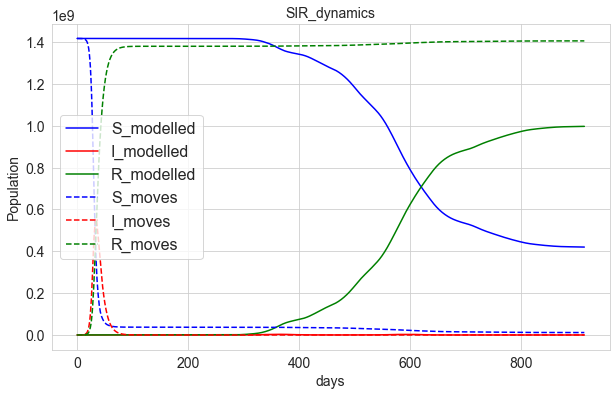

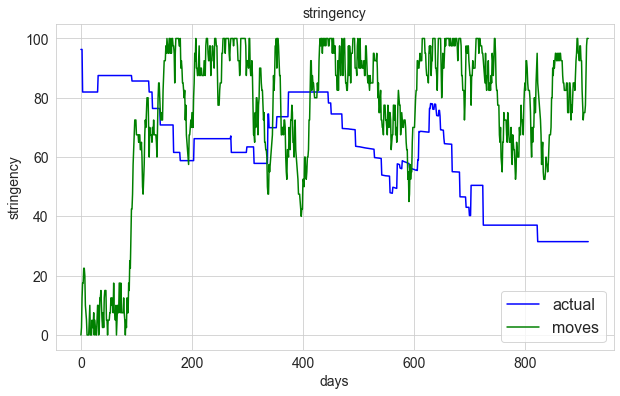

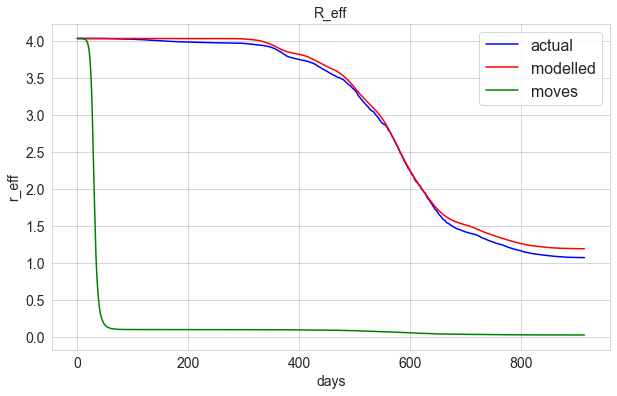

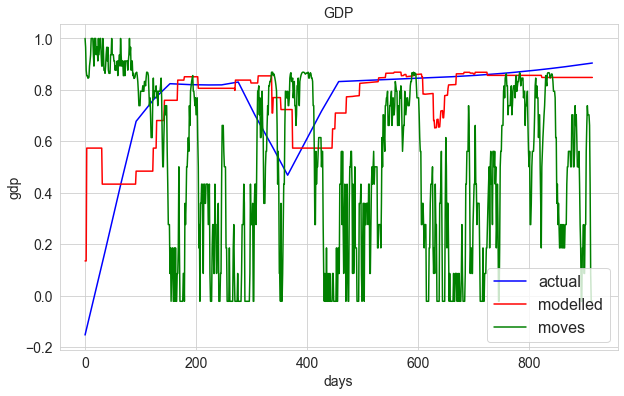

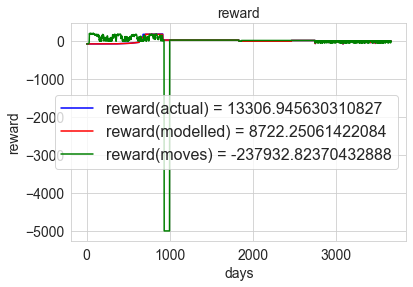

In [75]:
rl_reward_moves, rl_reward_weighted, rl_reward_I_percentage, rl_reward_r_eff, rl_reward_inertia = reward_strategy(stringency_index_from_actions_taken, reward_strategy_choosen=3, sir_technique=1)